# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
import scipy.stats as sts
from pprint import pprint
# Import API key
from config import openwather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#start a counter for city #
city_count = 0

# start empty lists to store data for our DF
City_ID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [6]:
# use for loop to cycle thru API call and gather raw data
for city in cities:
    # create a try/except for cities not found on open weather api
    try:
        # call api inside of our try/except
        response = rq.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={openwather_api_key}').json()
        
        # add 1 to count for each iteration
        city_count += 1
        
        # append data to our empty lists
        City_ID.append(response['id'])
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
        # Include a print log of each city as it's being processed
        #print(f'City Name: {city} - City Number: {city_count}')
        #print()
        
    except:
        # print value if not found
        #print('City not Found, skipping...')

City Name: erzin - City Number: 1

City Name: bambous virieux - City Number: 2

City Name: labuan - City Number: 3

City Name: bandarbeyla - City Number: 4

City Name: isangel - City Number: 5

City Name: baturite - City Number: 6

City Name: neuquen - City Number: 7

City Name: boke - City Number: 8

City Name: ushuaia - City Number: 9

City Name: nanortalik - City Number: 10

City Name: bluff - City Number: 11

City Name: hirara - City Number: 12

City not Found, skipping...
City Name: barabai - City Number: 14

City Name: albany - City Number: 15

City Name: mahebourg - City Number: 16

City Name: jamestown - City Number: 17

City Name: daru - City Number: 18

City Name: khatanga - City Number: 19

City Name: angoram - City Number: 20

City Name: barrow - City Number: 21

City Name: kaitangata - City Number: 22

City Name: victoria - City Number: 23

City Name: vaini - City Number: 24

City not Found, skipping...
City Name: beringovskiy - City Number: 26

City Name: balkanabat - Cit

### DataFrame
* Convert Raw Data to a DataFrame
* Display the DataFrame
    * Headers should be: 'City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat','Lng', 'Max_Temp', 'Wind_Speed'

In [12]:
lst_of_list = [
               City_ID,
               City,
               Cloudiness,
               Country,
               Date,
               Humidity,
               Lat,
               Lng,
               Max_Temp,
               Wind_Speed
              ]

city_df = pd.DataFrame(lst_of_list) 
city_df = city_df.transpose()
city_df.columns = ['City_ID', 'City', 'Cloudiness',
                   'Country', 'Date', 'Humidity',
                   'Lat','Lng', 'Max_Temp', 'Wind_Speed']

In [13]:
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,296852,Erzin,100,TR,1612058568,97,36.9559,36.2,48.99,1.99
1,1106677,Bambous Virieux,20,MU,1612058747,83,-20.3428,57.7575,78.8,6.91
2,1733782,Labuan,20,MY,1612058686,78,5.2767,115.242,82.4,2.3
3,64814,Bandarbeyla,99,SO,1612058747,72,9.4942,50.8122,73.6,15.84
4,2136825,Isangel,75,VU,1612058747,74,-19.55,169.267,84.2,11.5
...,...,...,...,...,...,...,...,...,...,...
551,3451138,Rio Grande,93,BR,1612058805,98,-32.035,-52.0986,68,12.17
552,3915350,Guayaramerín,100,BO,1612058806,95,-10.8368,-65.3614,75.33,1.92
553,3936456,Lima,0,PE,1612058806,78,-12.0432,-77.0282,75.99,12.66
554,2136697,Lakatoro,96,VU,1612058806,63,-16.0999,167.416,85.03,11.23


## Output File (CSV)
* Export the city data DataFrame into a .csv file

In [16]:
city_df.to_csv('../output_data/cities2.csv', index=False)
pd.read_csv('../output_data/cities2.csv')

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,296852,Erzin,100,TR,1612058568,97,36.9559,36.2000,48.99,1.99
1,1106677,Bambous Virieux,20,MU,1612058747,83,-20.3428,57.7575,78.80,6.91
2,1733782,Labuan,20,MY,1612058686,78,5.2767,115.2417,82.40,2.30
3,64814,Bandarbeyla,99,SO,1612058747,72,9.4942,50.8122,73.60,15.84
4,2136825,Isangel,75,VU,1612058747,74,-19.5500,169.2667,84.20,11.50
...,...,...,...,...,...,...,...,...,...,...
551,3451138,Rio Grande,93,BR,1612058805,98,-32.0350,-52.0986,68.00,12.17
552,3915350,Guayaramerín,100,BO,1612058806,95,-10.8368,-65.3614,75.33,1.92
553,3936456,Lima,0,PE,1612058806,78,-12.0432,-77.0282,75.99,12.66
554,2136697,Lakatoro,96,VU,1612058806,63,-16.0999,167.4164,85.03,11.23


## Inspect the data
* Remove the cities where the humidity > 100%.
    * Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
index = city_df.loc[city_df['Humidity']>100].index
index
# No values returned with humidity > 100

Int64Index([], dtype='int64')

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index, inplace=False)
clean_city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,296852,Erzin,100,TR,1612058568,97,36.9559,36.2,48.99,1.99
1,1106677,Bambous Virieux,20,MU,1612058747,83,-20.3428,57.7575,78.8,6.91
2,1733782,Labuan,20,MY,1612058686,78,5.2767,115.242,82.4,2.3
3,64814,Bandarbeyla,99,SO,1612058747,72,9.4942,50.8122,73.6,15.84
4,2136825,Isangel,75,VU,1612058747,74,-19.55,169.267,84.2,11.5
...,...,...,...,...,...,...,...,...,...,...
551,3451138,Rio Grande,93,BR,1612058805,98,-32.035,-52.0986,68,12.17
552,3915350,Guayaramerín,100,BO,1612058806,95,-10.8368,-65.3614,75.33,1.92
553,3936456,Lima,0,PE,1612058806,78,-12.0432,-77.0282,75.99,12.66
554,2136697,Lakatoro,96,VU,1612058806,63,-16.0999,167.416,85.03,11.23


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.
    * Temperature (F) vs. Latitude
    * Humidity (%) vs. Latitude
    * Cloudiness (%) vs. Latitude
    * Wind Speed (mph) vs. Latitude
* After each plot, add a sentence or two explaining what the code is analyzing

## Latitude vs. Temperature Plot

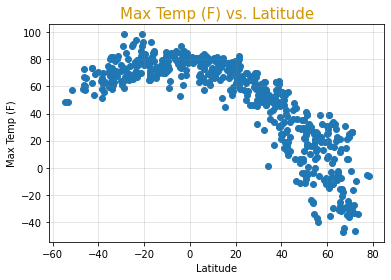

In [122]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Max_Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
plt.show()

## Latitude vs. Humidity Plot

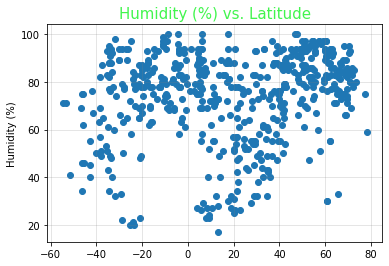

In [121]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'])
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
plt.show()

## Latitude vs. Cloudiness Plot

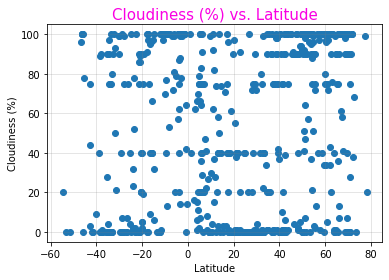

In [120]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
plt.show()

## Latitude vs. Wind Speed Plot

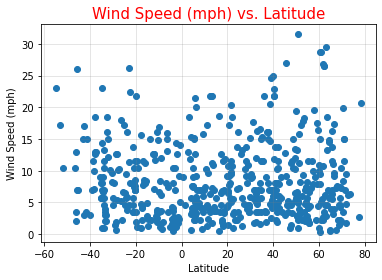

In [118]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
plt.show()

## Linear Regression
* The second requirement is to run linear regression on each relationship. 
* Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* After each pair of plots, take the time to explain what the linear regression is modeling. 
    * For example, describe any relationships you notice and any other analysis you may have.

In [109]:
# create new DFs for Northern Hemisphere and Southern Hemisphere
NH_city_df = clean_city_df.loc[clean_city_df['Lat']>=0]
SH_city_df = clean_city_df.loc[clean_city_df['Lat']<0]
SH_city_df['Lat']

1     -20.3428
4       -19.55
5      -4.3286
6     -38.9516
8        -54.8
        ...   
550   -20.2833
551    -32.035
552   -10.8368
553   -12.0432
554   -16.0999
Name: Lat, Length: 180, dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

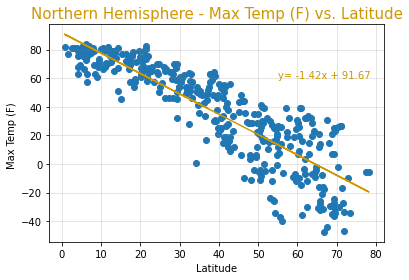

Rval = -0.8709479582968985


In [110]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Max_Temp'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Max_Temp'])
plt.plot(NH_city_df['Lat'], regress_line, color='#d19600')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (55,60), color='#d19600')
#plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F) ')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

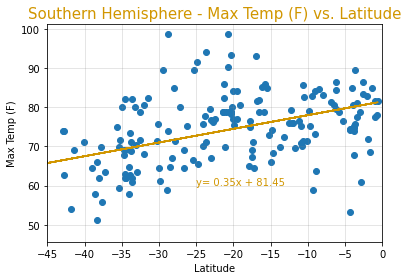

Rval = 0.4837003279106624


In [111]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Max_Temp'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Max_Temp'])
plt.plot(SH_city_df['Lat'], regress_line, color='#d19600')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-25,60), color='#d19600')
plt.xlim(-45, 0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

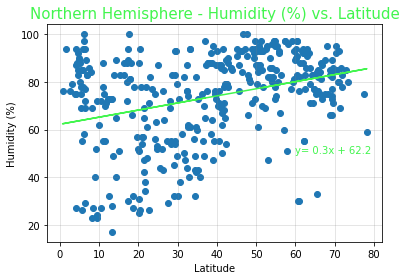

Rval = 0.32433946462663266


In [112]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Humidity'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Humidity'])
plt.plot(NH_city_df['Lat'], regress_line, color='#42f54e')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (60,50), color='#42f54e')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

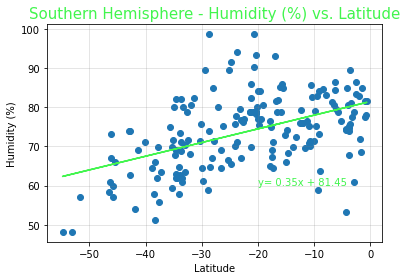

Rval = 0.4837003279106624


In [113]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Max_Temp'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Max_Temp'])
plt.plot(SH_city_df['Lat'], regress_line, color='#42f54e')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-20,60), color='#42f54e')
#plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

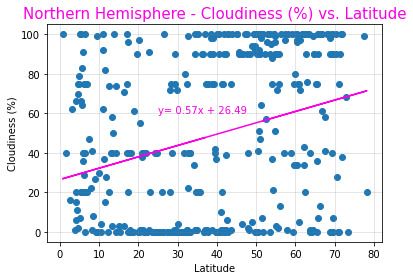

Rval = 0.29282945101661717


In [114]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Cloudiness'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Cloudiness'])
plt.plot(NH_city_df['Lat'], regress_line, color='#fa00e3')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (25,60), color='#fa00e3')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

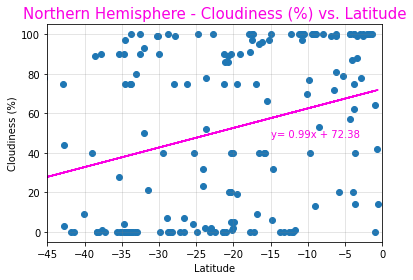

Rval = 0.30918236099642615


In [115]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Cloudiness'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'], SH_city_df['Cloudiness'])
plt.plot(SH_city_df['Lat'], regress_line, color='#fa00e3')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-15,48), color='#fa00e3')
plt.xlim(-45, 0)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

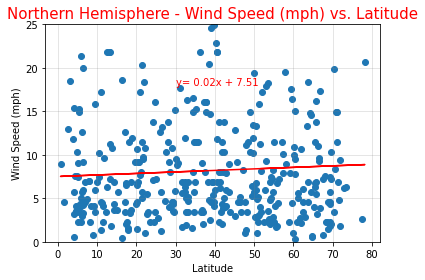

Rval = 0.06005347870500901


In [116]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Wind_Speed'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Wind_Speed'])
plt.plot(NH_city_df['Lat'], regress_line, color='red')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (30,18), color='red')
plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

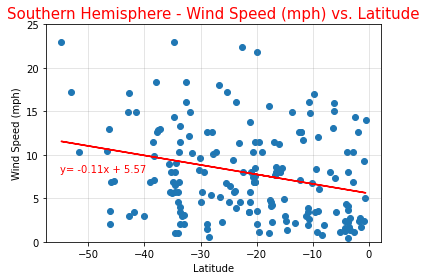

Rval = -0.26142205618334036


In [117]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Wind_Speed'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Wind_Speed'])
plt.plot(SH_city_df['Lat'], regress_line, color='red')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-55,8), color='red')
plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
plt.show()
print(f'Rval = {rval}')